In [152]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
# Import data
train = pd.read_csv("train.csv").set_index("PassengerId")
test = pd.read_csv("test.csv")

In [13]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [76]:
# It can be seen that "Cabin" column has more that 50% missing values, so we drop this column
data1 = train.drop(columns="Cabin")
data1.head()
                   

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [77]:
# Since column "Name" and "Ticket" contains all unique values corresponding to PassengerId, so we can drop these column
data1 = data1.drop(columns=["Name", "Ticket"])
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [19]:
data1["Fare"].nunique()

248

In [21]:
features = ["Pclass", "Sex", "Embarked"]
target = "Survived"

# Now lets see effect of features on survival

### Pclass  [1:Upper,  2:Middle, 3:Lower]

In [32]:
pd.DataFrame(data1["Pclass"].groupby(data1["Survived"]).value_counts())

Pclass
Survived Pclass        
0        3          372
         2           97
         1           80
1        1          136
         3          119
         2           87

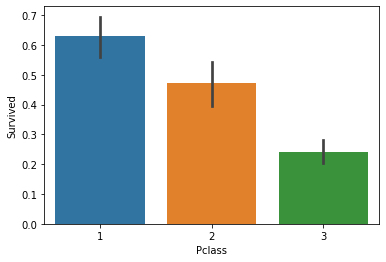

In [33]:
sns.barplot(x=data1["Pclass"], y=data1["Survived"]);

From above value_count and plot, we can see that almost 60% of "Upper" class, 50% of "Middle" class and 25% of "Lower"
class people survived.

So we can say that "Pclass" have a certain influence on survival but not much.

### Sex

In [36]:
pd.DataFrame(data1["Sex"].groupby(data1["Survived"]).value_counts())

Sex
Survived Sex        
0        male    468
         female   81
1        female  233
         male    109

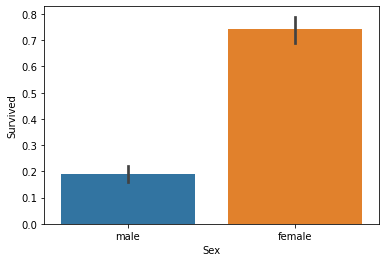

In [40]:
sns.barplot(x=data1["Sex"], y=data1["Survived"] );

It can be seen clearly that Female survival rate is almost 75% compared to 20% of Male.
So it can be concluded that "Sex" is a major factor affecting the survival rate.

### Embarked [C = Cherbourg, Q = Queenstown, S = Southampton]

In [39]:
pd.DataFrame(data1["Embarked"].groupby(data1["Survived"]).value_counts())

Embarked
Survived Embarked          
0        S              427
         C               75
         Q               47
1        S              217
         C               93
         Q               30

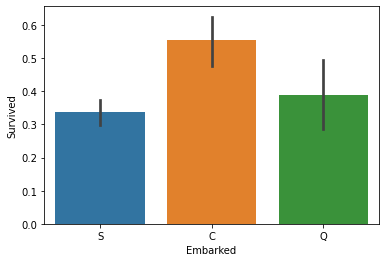

In [41]:
sns.barplot(x=data1["Embarked"], y=data1["Survived"] );

We can see that more ratio of people who embarked from "Cherbourg" survived and other two have similar survival rates
so "Embarked" can be a minor affecting factor.

### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

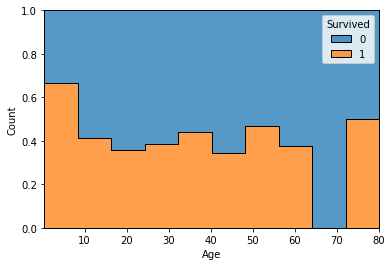

In [60]:
sns.histplot(data=data1, x="Age", hue="Survived", bins=10, element="step", multiple="fill")

In [78]:
data1.dropna(inplace=True)

In [79]:
data1["Sex"].replace({"male":0, "female":1}, inplace=True)

In [84]:
data1["Embarked"].replace({"S":1,"C":2,"Q":3}, inplace=True)

In [125]:
X, y = data1.drop(columns=["Survived","Age"]), data1["Survived"]

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [97]:
y_train.shape

(569,)

In [127]:
k_model = KNeighborsClassifier()

In [128]:
k_model.fit(X_train, y_train)

KNeighborsClassifier()

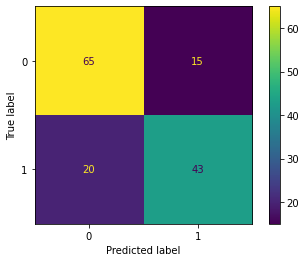

In [129]:
ConfusionMatrixDisplay.from_estimator(k_model, X_test, y_test)

In [130]:
y_pred = k_model.predict(X_test)

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        80
           1       0.74      0.68      0.71        63

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.75      0.76      0.75       143



In [132]:
param = {"n_neighbors": range(2,20), "weights":["uniform", "distance"]}

In [133]:
cross_valid = GridSearchCV(k_model, param_grid=param)

In [134]:
cross_valid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 20),
                         'weights': ['uniform', 'distance']})

In [135]:
cross_valid.best_estimator_

KNeighborsClassifier(n_neighbors=12, weights='distance')

In [136]:
best_model = cross_valid.best_estimator_

In [137]:
best_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12, weights='distance')

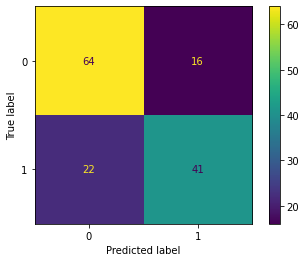

In [138]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

In [139]:
y_pred_best = best_model.predict(X_test)

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        80
           1       0.74      0.68      0.71        63

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.75      0.76      0.75       143



In [141]:
print(best_model.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 12, 'p': 2, 'weights': 'distance'}


In [165]:
d_model = DecisionTreeClassifier( max_depth=5, random_state=1)

In [166]:
d_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [167]:
print(d_model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}


In [157]:
X_train.shape

(569, 6)

In [158]:
r_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

In [159]:
r_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [160]:
print(r_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [161]:
y_pred_r = r_model.predict(X_test)

In [169]:
print(classification_report(y_test, y_pred_r))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        80
           1       0.78      0.57      0.66        63

    accuracy                           0.74       143
   macro avg       0.75      0.72      0.73       143
weighted avg       0.75      0.74      0.73       143



In [168]:
y_pred_d = d_model.predict(X_test)

In [170]:
print(classification_report(y_test, y_pred_d))

              precision    recall  f1-score   support

           0       0.71      0.93      0.80        80
           1       0.85      0.52      0.65        63

    accuracy                           0.75       143
   macro avg       0.78      0.72      0.73       143
weighted avg       0.77      0.75      0.74       143

